## Objective: Predict the percentage of a student based on the number of study hours.


In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split 
import seaborn as sns

### Loading the data from given url

In [3]:
url = "http://bit.ly/w-data"
study_hrs = pd.read_csv(url)

study_hrs

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting distribution of both the features

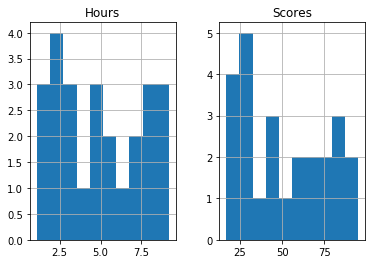

In [4]:
hist=study_hrs.hist(bins=10)

## Trend and correlation analysis

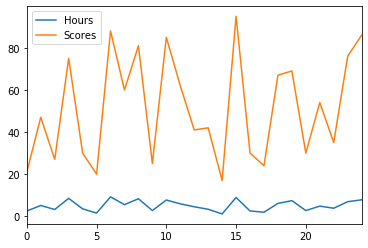

In [5]:
lines = study_hrs.plot.line()

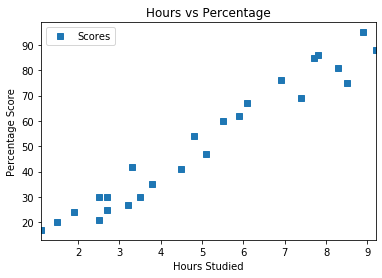

In [6]:
study_hrs.plot(x='Hours', y='Scores', style='s')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
corr_ = study_hrs.corr()
corr_

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


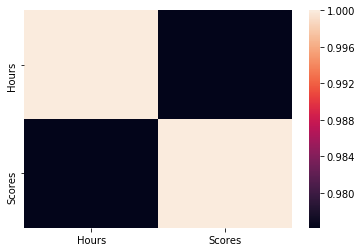

In [8]:
sns.heatmap(corr_)

In [9]:
#Inference: Above plots show a strong positive correlation between number of hours of study and percentage scores.

# Preparing data for aaplying ML model

In [10]:
#Splitting data into Independent and dependent attributes.

X = study_hrs.iloc[:, :-1].values  #Independent variable
y = study_hrs.iloc[:, 1].values  #Label data or dependent variable

## Splitting into test data and train data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Applying Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

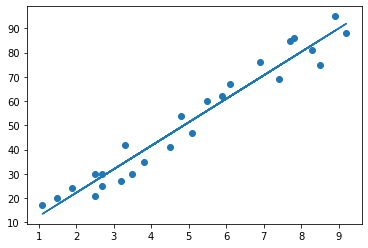

In [13]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [14]:
#define a function to display various scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [15]:
print(X_test) # Test data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


## Applying cross validation on training data 

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
linear_rmse_scores = np.sqrt(-scores) #calculating root mean square error for different validation sets
linear_rmse_scores

array([5.54113198, 5.95650253, 7.18289381, 7.30047514, 5.75373914])

In [18]:
#Scores of cross validation
display_scores(linear_rmse_scores)

Scores: [5.54113198 5.95650253 7.18289381 7.30047514 5.75373914]
Mean: 6.346948518937316
Standard deviation: 0.7431962407333277


# Comparative analysis: Actual vs Predicted

In [19]:
df = pd.DataFrame({'Hours': X_test.flatten(), 'Actual': y_test, 'Predicted': y_pred})
df1=df.sort_values(by=['Actual'])
print(df1.to_string(index=False))


 Hours  Actual  Predicted
   2.5      21  27.032088
   2.5      30  27.032088
   5.9      62  59.951153
   6.9      76  69.633232
   8.3      81  83.188141


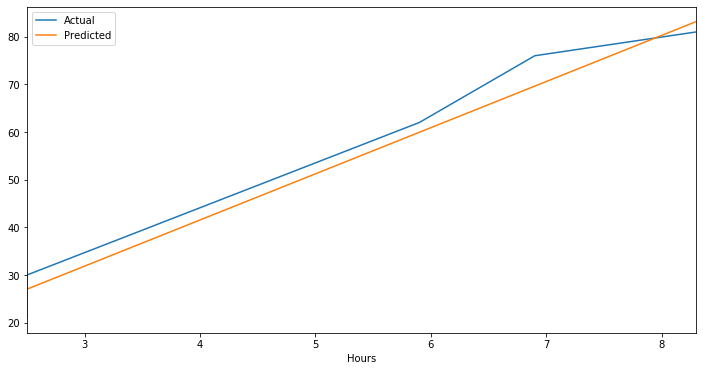

In [138]:
df_plot = df1.set_index('Hours')
lines = df_plot.plot.line(figsize=(12,6))

# Evaluating the model

In [139]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse #display root mean square error

4.352380006653288

# Predicting from our input

In [140]:
study_hrs.Hours[0] = 7.8
own_pred = regressor.predict(study_hrs.Hours[0].reshape(-1,1))
print("No of Hours = {}".format(study_hrs.Hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 7.8
Predicted Score = 78.34710195865416


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
